### Instructor Demo: Diversification

This program reads in the CSV datasets of several stocks and calculates a correlation table and heatmap to determine the semiconductor stock that is least correlated to `JNJ` and `HD`.

In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

### Read CSV in as DataFrame

In [2]:
# Set file paths
hd_data = Path("../Resources/HD.csv")
jnj_data = Path("../Resources/JNJ.csv")
intc_data = Path("../Resources/INTC.csv")
amd_data = Path("../Resources/AMD.csv")
mu_data = Path("../Resources/MU.csv")
nvda_data = Path("../Resources/NVDA.csv")
tsm_data = Path("../Resources/TSM.csv")

# Read the individual CSV datasets
hd = pd.read_csv(hd_data, index_col="date")
jnj = pd.read_csv(jnj_data, index_col="date")
intc = pd.read_csv(intc_data, index_col="date")
amd = pd.read_csv(amd_data, index_col="date")
mu = pd.read_csv(mu_data, index_col="date")
nvda = pd.read_csv(nvda_data, index_col="date")
tsm = pd.read_csv(tsm_data, index_col="date")

intc.head()

,INTC
date,
5/14/19,45.17
5/13/19,44.76
5/10/19,46.20
5/9/19,46.62
5/8/19,49.24


### Combine the DataFrames

In [11]:
# Use the `concat` function to combine the DataFrames by matching indexes (or in this case `date`)
joined_data = pd.concat([hd, jnj, intc, amd, mu, nvda, tsm], axis = "columns", join = "inner")
joined_data

,HD,JNJ,INTC,AMD,MU,NVDA,TSM
date,,,,,,,
5/14/19,191.62,66.9700,45.17,27.32,38.51,162.04,41.9700
5/13/19,190.34,66.4900,44.76,26.24,37.38,158.45,40.9900
5/10/19,194.58,67.2200,46.20,27.96,38.94,168.82,42.8300
5/9/19,194.58,66.0400,46.62,27.21,39.27,170.19,43.2500
5/8/19,195.17,66.0200,49.24,27.09,39.75,173.92,43.7000
...,...,...,...,...,...,...,...
5/20/09,23.83,12.3299,15.58,4.50,4.80,9.73,10.4677
5/19/09,24.63,12.3875,15.65,4.39,4.85,9.45,10.5871
5/18/09,26.02,12.1925,15.52,4.14,4.68,9.27,10.4975


### Calculate Daily Returns

In [12]:
# Use the `pct_change` function to calculate daily returns for each stock
daily_returns = joined_data.pct_change()
daily_returns.head()

,HD,JNJ,INTC,AMD,MU,NVDA,TSM
date,,,,,,,
5/14/19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5/13/19,-0.006680,-0.007167,-0.009077,-0.039531,-0.029343,-0.022155,-0.023350
5/10/19,0.022276,0.010979,0.032172,0.065549,0.041734,0.065447,0.044889
5/9/19,0.000000,-0.017554,0.009091,-0.026824,0.008475,0.008115,0.009806
5/8/19,0.003032,-0.000303,0.056199,-0.004410,0.012223,0.021917,0.010405


### Calculate Correlation

In [13]:
# Use the `corr` function to calculate correlations for each stock pair
correlation = daily_returns.corr()

### Plot Correlation

<AxesSubplot:>

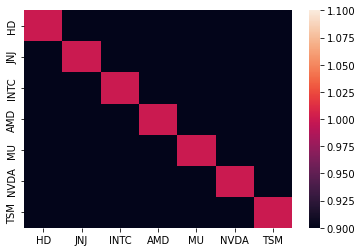

In [14]:
# Create a heatmap from the correlation values
sns.heatmap(correlation, vmin = 1, vmax = 1)

<AxesSubplot:>

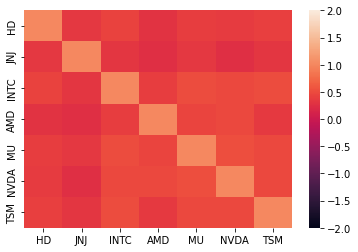

In [15]:
# Create a heatmap from the correlation values and adjust the scale
sns.heatmap(correlation, vmin = -2, vmax = 2)

### Which semiconductor stock would be the best candidate to add to the existing portfolio?